THIRD APPORACH
ALL FEATURES
RIVER ALAGNAK

GradientBoostingRegressor

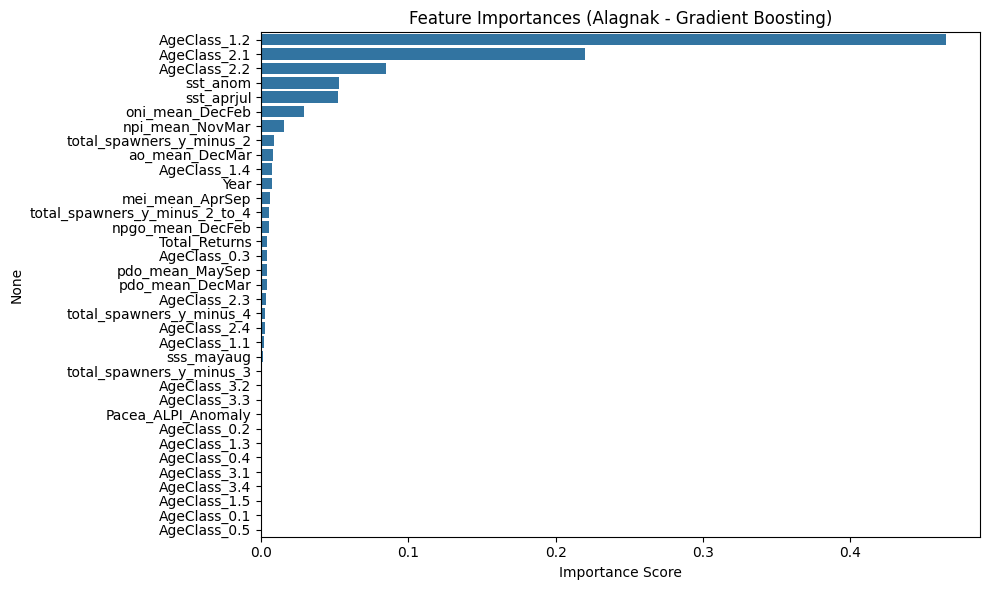

📊 Gradient Boosting Evaluation Metrics (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔹 R²   (train): 1.0000     | R²   (test): -2.8547
🔹 MSE  (train): 15602.18     | MSE  (test): 6501775721824.50
🔹 MAPE (train): 0.01%   | MAPE (test): 73.26%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply split function ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# Drop target column and remove 'River'
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']
X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 3: Train model ===
gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
gbr.fit(X_train, y_train)

# === Step 4: Feature Importances ===
feature_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Alagnak - Gradient Boosting)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 5: Predict & Evaluate ===
y_pred_test = gbr.predict(X_test)
y_pred_train = gbr.predict(X_train)

# Test evaluation
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Train evaluation
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# === Step 6: Print results ===
print("📊 Gradient Boosting Evaluation Metrics (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train): {mse_train:.2f}     | MSE  (test): {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%   | MAPE (test): {mape_test:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "THIRD APPROACH - ALL FEATURES - Alagnak Only\n"
    "Gradient Boosting Evaluation Metrics:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Erro train):      {mse_train:.2f}\n"
    f"MSE  (Mean Squared Error test):      {mse_test:.2f}\n"
    f"MAPE (MAPE train):   {mape_train:.2f}%\n"
    f"MSE  (MAPE test):      {mape_test:.2f}\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


Polynomial Regression

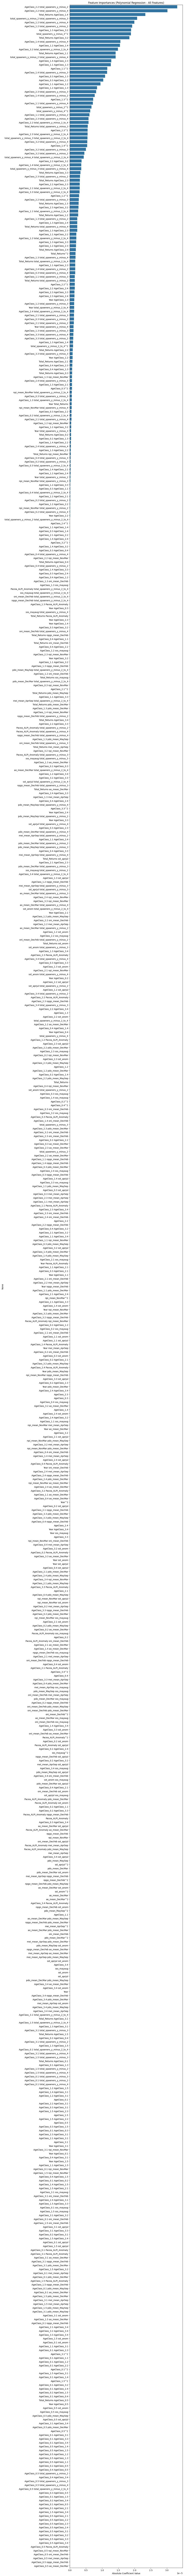

📊 Polynomial Regression Evaluation Metrics (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔹 R²   (train): 1.0000     | R²   (test): -17970.7745
🔹 MSE  (train): 0.00     | MSE  (test): 30312855750116256.00
🔹 MAPE (train): 0.00%   | MAPE (test): 4081.97%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Split by time (Alagnak only) ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']
X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Polynomial Regression ===
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X_train.columns)

# === Step 5: Train model ===
model = LinearRegression()
model.fit(X_train_poly, y_train)

# === Step 6: Feature importances plot ===
coefficients = pd.Series(model.coef_, index=feature_names)
top_features = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Polynomial Regression - All Features)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

# === Step 7: Predict & Evaluate ===
y_pred_test = model.predict(X_test_poly)
y_pred_train = model.predict(X_train_poly)

# Test evaluation
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Train evaluation
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# === Step 8: Print metrics ===
print("📊 Polynomial Regression Evaluation Metrics (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train): {mse_train:.2f}     | MSE  (test): {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%   | MAPE (test): {mape_test:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "THIRD APPROACH - ALL FEATURES - Alagnak Only\n"
    "Polynomial Regression:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Erro train):      {mse_train:.2f}\n"
    f"MSE  (Mean Squared Error test):      {mse_test:.2f}\n"
    f"MAPE (MAPE train):   {mape_train:.2f}%\n"
    f"MSE  (MAPE test):      {mape_test:.2f}\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


Linear Regression

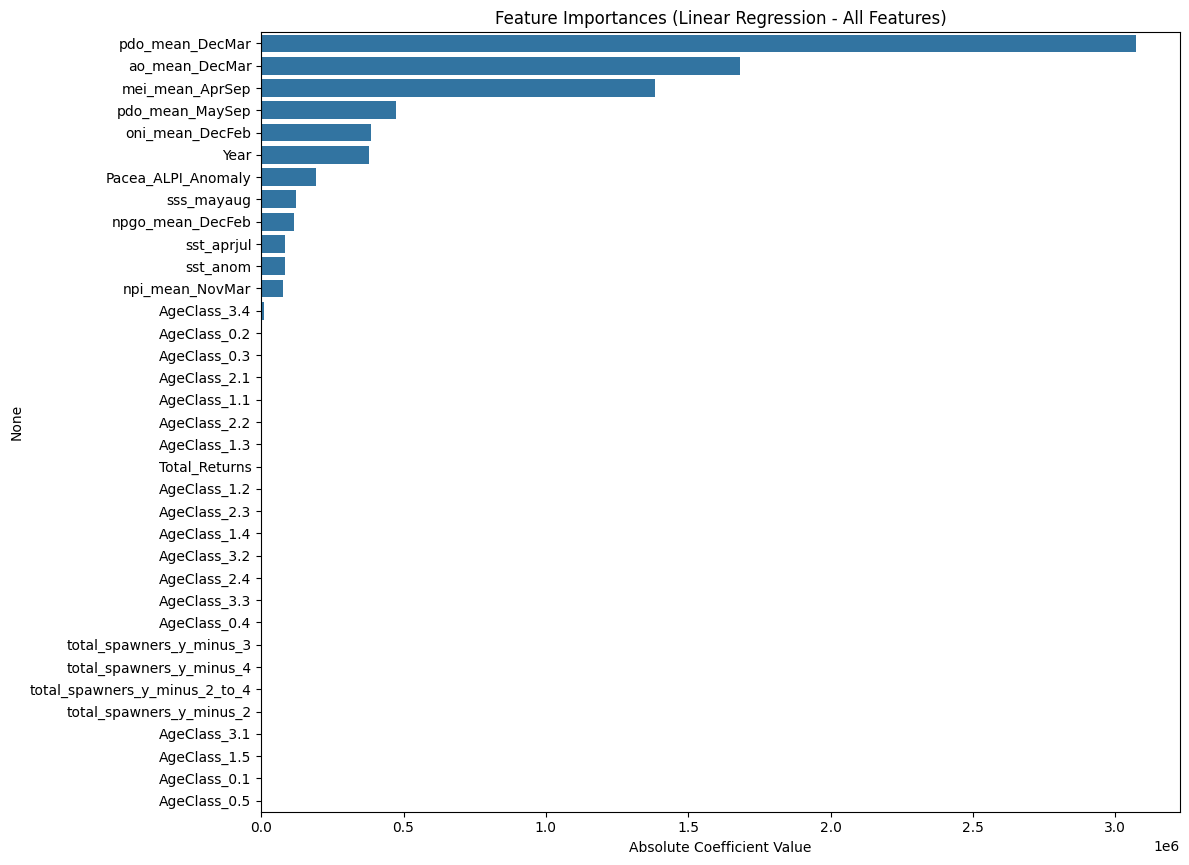

📊 Linear Regression Evaluation Metrics (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔹 R²   (train): 0.9944     | R²   (test): -14.4659
🔹 MSE  (train): 19136573635.82     | MSE  (test): 26086135136093.02
🔹 MAPE (train): 5.09%   | MAPE (test): 146.11%
📊 Polynomial Regression Evaluation Metrics (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔹 R²   (train): 0.9944     | R²   (test): -14.4659
🔹 MSE  (train): 19136573635.82     | MSE  (test): 26086135136093.02
🔹 MAPE (train): 5.09%   | MAPE (test): 146.11%


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Filter only 'Alagnak' river
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Split time-series ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)
    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak, "Year", ["River"], test_fraction=0.2, gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']
X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Train model ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Step 5: Coefficient plot ===
coefficients = pd.Series(model.coef_, index=X_train.columns)
top_features = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Linear Regression - All Features)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

# === Step 6: Predict & Evaluate ===
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluation for test
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Evaluation for train
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# === Step 7: Print metrics ===
print("📊 Linear Regression Evaluation Metrics (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train): {mse_train:.2f}     | MSE  (test): {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%   | MAPE (test): {mape_test:.2f}%")

# === Step 8: Print metrics ===
print("📊 Polynomial Regression Evaluation Metrics (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train): {mse_train:.2f}     | MSE  (test): {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%   | MAPE (test): {mape_test:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "THIRD APPROACH - ALL FEATURES - Alagnak Only\n"
    "Linear Regression:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Erro train):      {mse_train:.2f}\n"
    f"MSE  (Mean Squared Error test):      {mse_test:.2f}\n"
    f"MAPE (MAPE train):   {mape_train:.2f}%\n"
    f"MSE  (MAPE test):      {mape_test:.2f}\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


Random Forest model

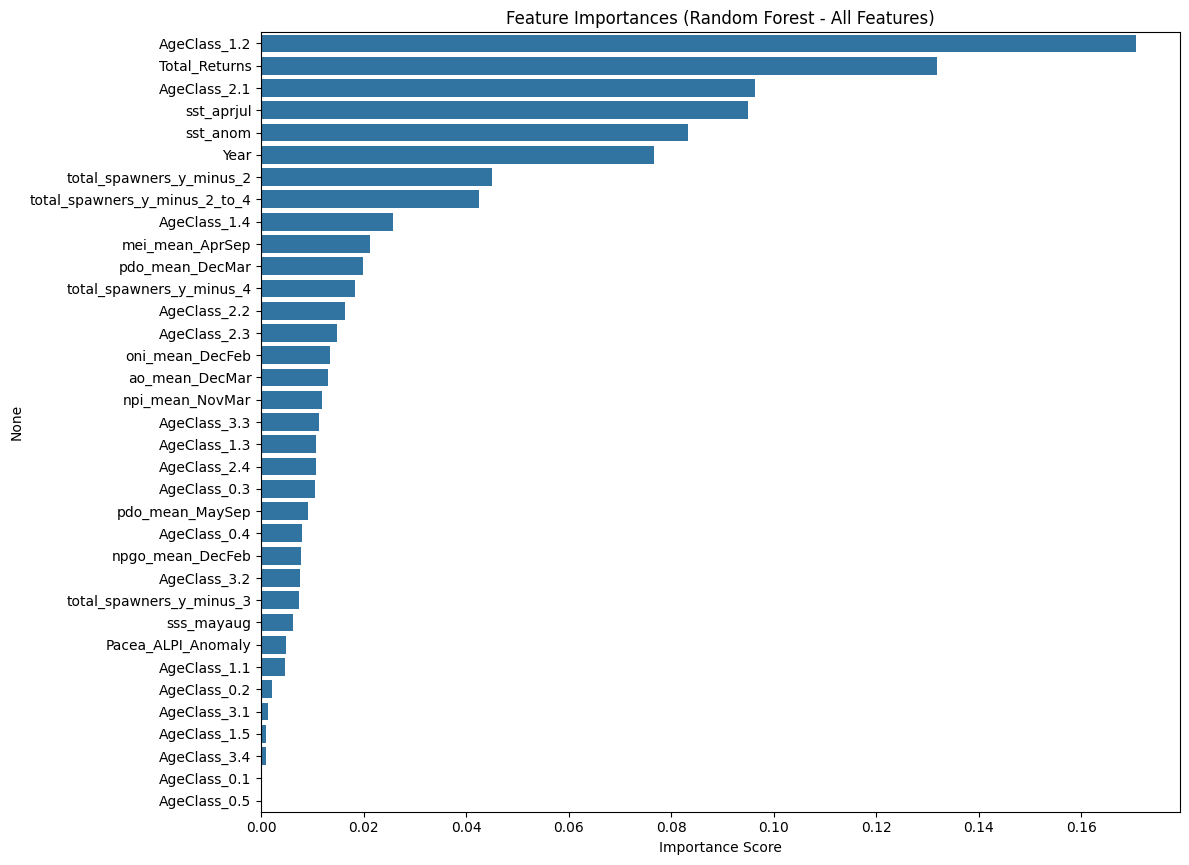

📊 Random Forest Evaluation Metrics (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔹 R²   (train): 0.9072     | R²   (test): -0.5042
🔹 MSE  (train): 318185129666.34     | MSE  (test): 2537174996364.19
🔹 MAPE (train): 21.29%   | MAPE (test): 45.67%


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)
    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak, "Year", ["River"], test_fraction=0.2, gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']
X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Train Random Forest ===
rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# === Step 5: Feature Importance Plot ===
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest - All Features)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 6: Predict & Evaluate ===
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

# Test evaluation
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Train evaluation
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# === Step 7: Print metrics ===
print("📊 Random Forest Evaluation Metrics (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train): {mse_train:.2f}     | MSE  (test): {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%   | MAPE (test): {mape_test:.2f}%")


# Define result string
result_str = (
    "\n\n===============================\n"
    "THIRD APPROACH - ALL FEATURES - Alagnak Only\n"
    "Random Forest:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Erro train):      {mse_train:.2f}\n"
    f"MSE  (Mean Squared Error test):      {mse_test:.2f}\n"
    f"MAPE (MAPE train):   {mape_train:.2f}%\n"
    f"MSE  (MAPE test):      {mape_test:.2f}\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


Random Forest Updated Code with Log Transform on Target

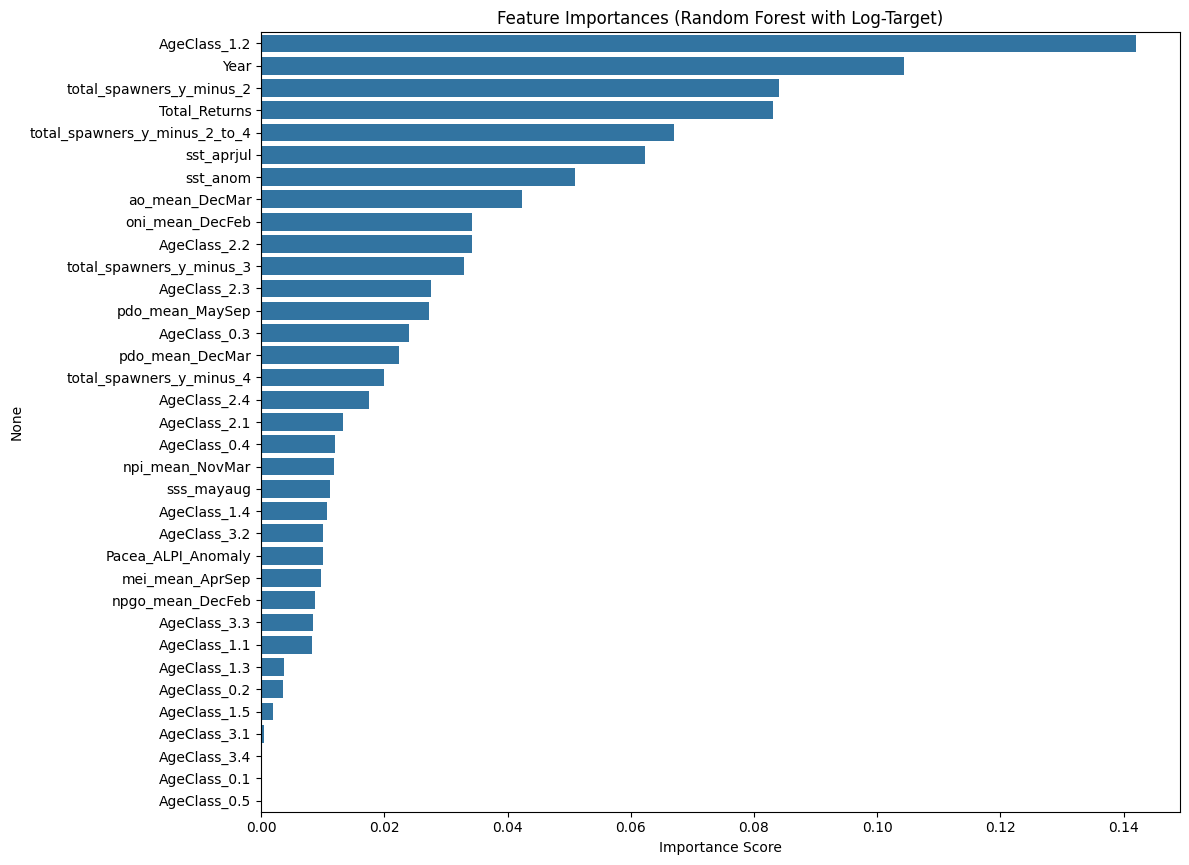


📊 Random Forest with Log-Transformed Target (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔹 R²   (train): 0.8588     | R²   (test): -0.2327
🔹 MSE  (train): 484158539776.86     | MSE  (test): 2079237734047.71
🔹 MAPE (train): 15.09%   | MAPE (test): 36.24%


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)
    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak, "Year", ["River"], test_fraction=0.2, gap_years=0
)

# === Step 3: Features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train_log = np.log1p(data_train['Total_Returns_NextYear'])

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Train Random Forest ===
rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train, y_train_log)

# === Step 5: Feature importances ===
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest with Log-Target)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 6: Predict and inverse log ===
y_pred_log_test = rf.predict(X_test)
y_pred_test = np.expm1(y_pred_log_test)

y_pred_log_train = rf.predict(X_train)
y_pred_train = np.expm1(y_pred_log_train)
y_train = data_train['Total_Returns_NextYear']

# === Step 7: Evaluation ===
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n📊 Random Forest with Log-Transformed Target (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train): {mse_train:.2f}     | MSE  (test): {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%   | MAPE (test): {mape_test:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "THIRD APPROACH - ALL FEATURES - Alagnak Only\n"
    "Random Forest with Log-Transformed Targett:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Erro train):      {mse_train:.2f}\n"
    f"MSE  (Mean Squared Error test):      {mse_test:.2f}\n"
    f"MAPE (MAPE train):   {mape_train:.2f}%\n"
    f"MSE  (MAPE test):      {mape_test:.2f}\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


 Random Forest + Log-Transform + GridSearchCV (Alagnak only):

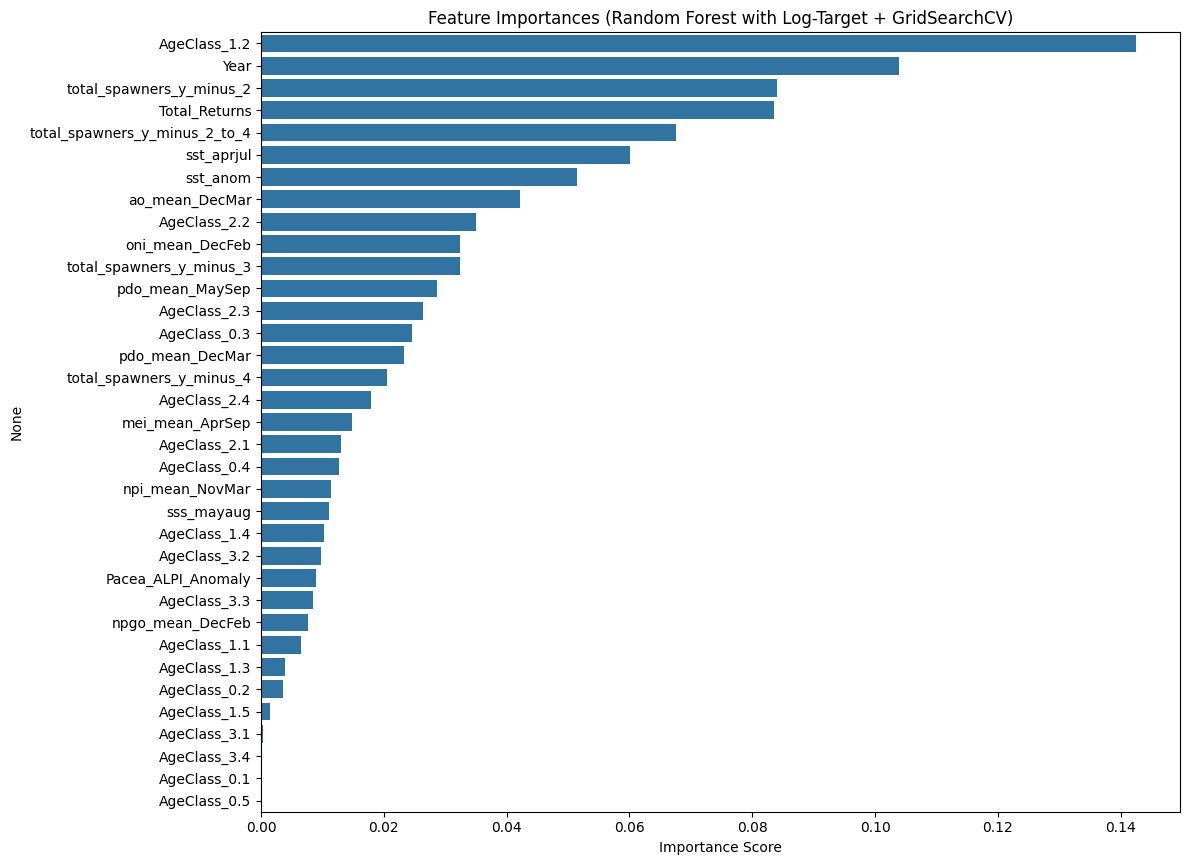

📊 Random Forest with Log-Transformed Target + GridSearchCV (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔧 Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
🔹 R²   (train): 0.8646     | R²   (test): -0.2627
🔹 MSE  (train):  464348319662.07   | MSE  (test):  2129739461766.47
🔹 MAPE (train): 14.90%  | MAPE (test): 36.04%


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)
    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak, time_column="Year", group_columns=["River"],
    test_fraction=0.2, gap_years=0
)

# === Step 3: Prepare features and targets ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train_log = np.log1p(data_train['Total_Returns_NextYear'])

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']
y_train = data_train['Total_Returns_NextYear']

# === Step 4: GridSearchCV for best hyperparameters ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train_log)
best_rf = grid_search.best_estimator_

# === Step 5: Feature importances ===
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest with Log-Target + GridSearchCV)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 6: Predict on test and train sets ===
y_pred_log_test = best_rf.predict(X_test)
y_pred_test = np.expm1(y_pred_log_test)

y_pred_log_train = best_rf.predict(X_train)
y_pred_train = np.expm1(y_pred_log_train)

# === Step 7: Evaluation ===
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# === Step 8: Print results ===
print("📊 Random Forest with Log-Transformed Target + GridSearchCV (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔧 Best Parameters: {grid_search.best_params_}")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train):  {mse_train:.2f}   | MSE  (test):  {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%  | MAPE (test): {mape_test:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "THIRD APPROACH - ALL FEATURES - Alagnak Only\n"
    "Random Forest with Log-Transformed Target + GridSearchCV:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Erro train):      {mse_train:.2f}\n"
    f"MSE  (Mean Squared Error test):      {mse_test:.2f}\n"
    f"MAPE (MAPE train):   {mape_train:.2f}%\n"
    f"MSE  (MAPE test):      {mape_test:.2f}\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


XGBoost Regressor

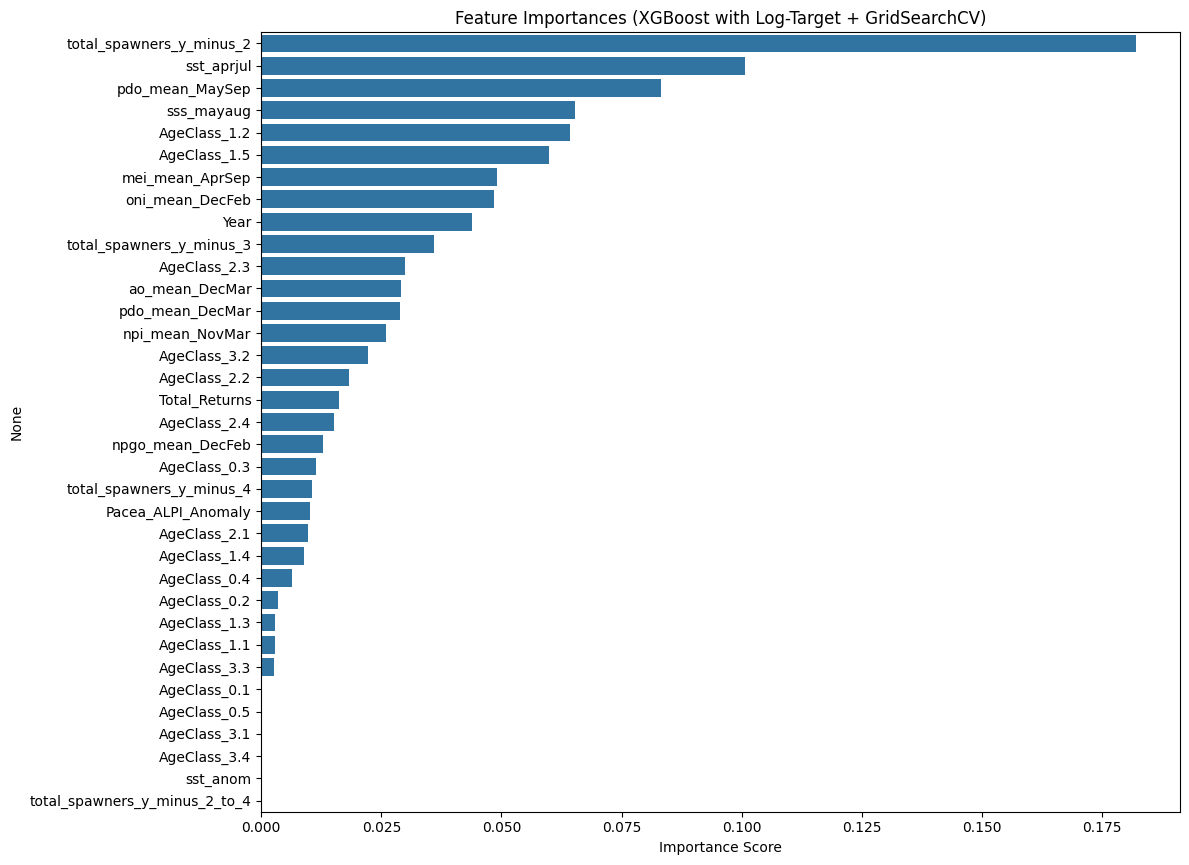

📊 XGBoost with Log-Transformed Target + GridSearchCV (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔧 Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
🔹 R²   (train): 0.9860     | R²   (test): -0.6694
🔹 MSE  (train):  48003830518.56   | MSE  (test):  2815792145695.45
🔹 MAPE (train): 2.24%  | MAPE (test): 40.77%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)
    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak, time_column="Year", group_columns=["River"], test_fraction=0.2, gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']
y_train_log = np.log1p(y_train)

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Hyperparameter tuning with GridSearchCV ===
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train_log)
best_xgb = grid_search.best_estimator_

# === Step 5: Feature Importances ===
feature_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (XGBoost with Log-Target + GridSearchCV)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 6: Predict (test & train) and reverse log1p ===
y_pred_log_test = best_xgb.predict(X_test)
y_pred_test = np.expm1(y_pred_log_test)

y_pred_log_train = best_xgb.predict(X_train)
y_pred_train = np.expm1(y_pred_log_train)

# === Step 7: Evaluation ===
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# === Step 8: Print Results ===
print("📊 XGBoost with Log-Transformed Target + GridSearchCV (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔧 Best Parameters: {grid_search.best_params_}")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train):  {mse_train:.2f}   | MSE  (test):  {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%  | MAPE (test): {mape_test:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "THIRD APPROACH - ALL FEATURES - Alagnak Only\n"
    "XGBoost with Log-Transformed Target + GridSearchCV:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Erro train):      {mse_train:.2f}\n"
    f"MSE  (Mean Squared Error test):      {mse_test:.2f}\n"
    f"MAPE (MAPE train):   {mape_train:.2f}%\n"
    f"MSE  (MAPE test):      {mape_test:.2f}\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


Simple XGBoost Regressor 

📊 XGBoost Evaluation Metrics (Alagnak only):
THIRD APPROACH - River Alagnak - ALL FEATURES
🔹 R²   (train): 1.0000     | R²   (test): -1.5759
🔹 MSE  (train):  0.14   | MSE  (test):  4344716678535.96
🔹 MAPE (train): 0.00%  | MAPE (test): 61.22%


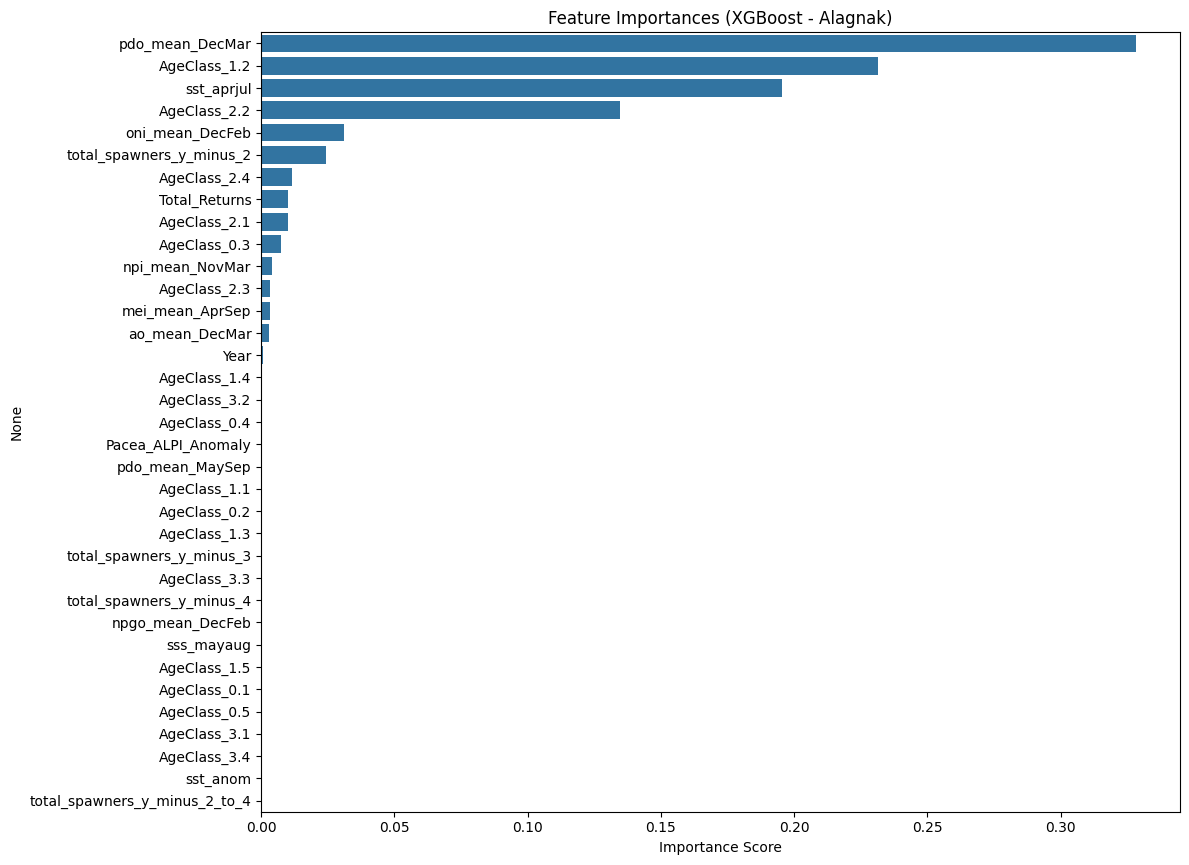

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)
    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak, time_column="Year", group_columns=["River"], test_fraction=0.2, gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Train XGBoost Regressor ===
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# === Step 5: Predict ===
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)

# === Step 6: Evaluate ===
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

print("📊 XGBoost Evaluation Metrics (Alagnak only):")
print("THIRD APPROACH - River Alagnak - ALL FEATURES")
print(f"🔹 R²   (train): {r2_train:.4f}     | R²   (test): {r2_test:.4f}")
print(f"🔹 MSE  (train):  {mse_train:.2f}   | MSE  (test):  {mse_test:.2f}")
print(f"🔹 MAPE (train): {mape_train:.2f}%  | MAPE (test): {mape_test:.2f}%")

# === Step 7: Feature Importance Plot ===
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (XGBoost - Alagnak)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Define result string
result_str = (
    "\n\n===============================\n"
    "THIRD APPROACH - ALL FEATURES - Alagnak Only\n"
    "XGBoost Evaluation Metrics:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Erro train):      {mse_train:.2f}\n"
    f"MSE  (Mean Squared Error test):      {mse_test:.2f}\n"
    f"MAPE (MAPE train):   {mape_train:.2f}%\n"
    f"MSE  (MAPE test):      {mape_test:.2f}\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)
